In [1]:
import pandas as pd 
## no module found -- install --pip install pandas--

In [2]:
#pandas - data manipulation and analysis
##data load 
df = pd.read_csv("cust_satisfaction.csv")

df.head()


,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
## x and y 
#dependent and independent variables

In [4]:
df.info()  ##information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [5]:
##preprocessing --- data clean -- null values and duplicates values 
##null values check and remove 
df.isnull().sum()
##to remove null values 
df.dropna(inplace=True)
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [6]:
##duplicates check and remove 
df.duplicated().sum()
#remove
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
##changing object data type to int data type 
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})
df["Customer Type"] = df["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})
df["Type of Travel"] = df["Type of Travel"].map({"Personal Travel":0,"Business travel":1})
df["Class"] = df["Class"].map({"Eco Plus":3,"Business":1,"Eco":2})
df["satisfaction"] = df["satisfaction"].map({"neutral or dissatisfied":0,"satisfied":1})

In [8]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,3,0,13,460,5,4,5,25,18.0
1,1,0,1,1,0,25,235,1,3,1,1,6.0
2,0,1,1,1,1,26,1142,5,4,5,0,0.0
3,0,1,1,1,0,25,562,2,3,2,11,9.0
4,1,1,1,1,1,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,0,1,2,0,23,192,2,4,2,3,0.0
103900,1,1,1,1,1,49,2347,5,5,4,0,0.0
103901,1,0,1,1,0,30,1995,4,4,4,7,14.0
103902,0,0,1,2,0,22,1000,1,1,1,0,0.0


In [10]:
df["Customer Type"].value_counts()

Customer Type
1    84517
0    18905
Name: count, dtype: int64

In [11]:
##handle imbalanced data
loyal_customer = df[df["Customer Type"] ==1].loc[0:20000]
disloyal_customer = df[df["Customer Type"] == 0]


In [12]:
balance_data = pd.concat([loyal_customer,disloyal_customer],axis=0)
balance_data

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,3,0,13,460,5,4,5,25,18.0
2,0,1,1,1,1,26,1142,5,4,5,0,0.0
3,0,1,1,1,0,25,562,2,3,2,11,9.0
4,1,1,1,1,1,61,214,3,4,3,0,0.0
5,0,1,0,2,0,26,1180,1,4,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103892,0,0,1,1,0,37,596,3,3,3,110,121.0
103895,0,0,1,2,0,24,1055,1,5,1,13,10.0
103899,0,0,1,2,0,23,192,2,4,2,3,0.0
103901,1,0,1,1,0,30,1995,4,4,4,7,14.0


In [13]:
balance_data.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [ ]:

##x and y -- dependent and independent variables
x = balance_data.drop("Customer Type",axis=1)
y = balance_data[["Customer Type"]]

In [15]:
##training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#normalize --- data ko ek range ke ander convert krne ke liye
from sklearn.preprocessing import StandardScaler
##mean = 0 and sd = 1 
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
##fit --learns the parameter from the data 
##tranform --applies the parameter on the data
##fit_tranform works on training data
x_test_scaled = sc.transform(x_test)
##transform --applies the parameter on the data
##transform works on testing data

In [20]:
x_train_scaled.shape[1]

11

In [21]:
##ann architecture 
##input layer
##hidden layer
##output layer
# pip install tensorflow -- cmd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#ann model defining 
model = Sequential()

##input layer 
model.add(Dense(68,activation="relu",input_dim = x_train_scaled.shape[1]))
##hidden layer 
model.add(Dense(32,activation="relu"))
model.add(Dense(24,activation="relu"))
model.add(Dense(12,activation="relu"))

##ouput layer 
model.add(Dense(1,activation="sigmoid"))

##model compile
model.compile(loss = "binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

c:\Users\jaikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 68)             │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,129 (16.13 KB)

 Trainable params: 4,129 (16.13 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
##formula for no of hidden layers = (no of inputs + no of outputs)/2
##formula of calcualting weights
# params = (input features +1) * no of neurons at layers 
##input layer 
(11+1)*68
##hidden layer 
(68+1)*32
(32+1)*24
(24+1)*12




300

In [24]:
##train the model 
history = model.fit(
    x_train_scaled,
    y_train,
    epochs = 20, 
    validation_data = (x_test_scaled,y_test) 
)

Epoch 1/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8587 - loss: 0.3545 - val_accuracy: 0.9064 - val_loss: 0.2355
Epoch 2/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9079 - loss: 0.2404 - val_accuracy: 0.9115 - val_loss: 0.2286
Epoch 3/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9127 - loss: 0.2263 - val_accuracy: 0.9150 - val_loss: 0.2218
Epoch 4/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9160 - loss: 0.2130 - val_accuracy: 0.9191 - val_loss: 0.2136
Epoch 5/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9181 - loss: 0.2085 - val_accuracy: 0.9193 - val_loss: 0.2129
Epoch 6/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9224 - loss: 0.2013 - val_accuracy: 0.9210 - val_loss: 0.2119
Epoch 7/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9218 - loss: 0.2044 - val_accuracy: 0.9237 - val_loss: 0.2035
Epoch 8/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9245 - loss: 0.1959 - val_accuracy: 0.

In [25]:
##model evaluation technique 
training_details = pd.DataFrame(history.history)
training_details

,accuracy,loss,val_accuracy,val_loss
0,0.892661,0.282349,0.906356,0.235509
1,0.908127,0.235219,0.911464,0.228602
2,0.912561,0.225035,0.915011,0.221794
3,0.916179,0.215604,0.919126,0.213572
4,0.919088,0.209535,0.919268,0.212892
5,0.921996,0.203777,0.920970,0.211899
6,0.923522,0.199214,0.923666,0.203477
7,0.923947,0.196536,0.923950,0.203361
8,0.925721,0.193838,0.926646,0.200668
9,0.926324,0.191453,0.926220,0.202346


<Axes: >

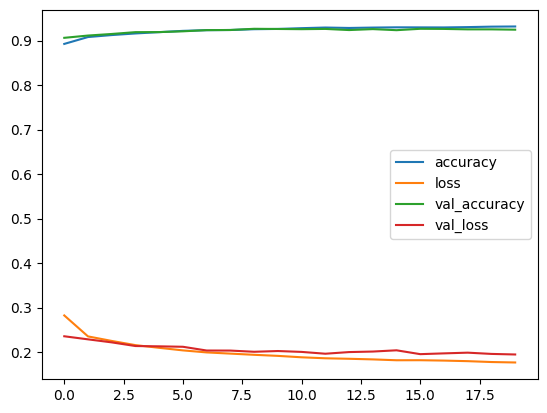

In [26]:
training_details.plot()

In [29]:
##get precdictions probability
y_pred = model.predict(x_test_scaled)
prediction_label = (y_pred>0.5).astype("int").ravel()
##ravel == multidimension array ko 1d array me convert kar deta hai 
prediction_label

221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step


array([1, 0, 0, ..., 1, 0, 1])

In [28]:
##regression -- mse , mae , rmse 
##class -- confusion matrix , accuracy , precision , recall , f1 score
from sklearn.metrics import confusion_matrix, classification_report


<Axes: >

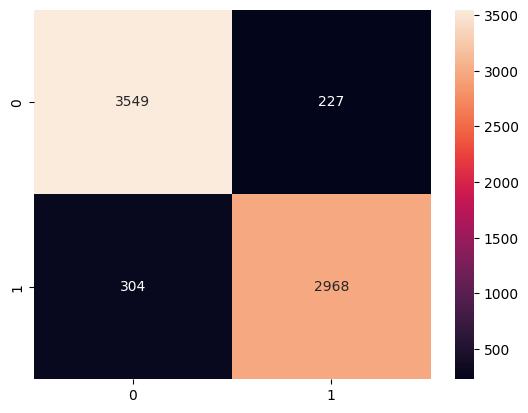

In [32]:
##
cm = confusion_matrix(y_test,prediction_label)
##heatmap 
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")


In [33]:
print(classification_report(y_test,prediction_label))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3776
           1       0.93      0.91      0.92      3272

    accuracy                           0.92      7048
   macro avg       0.93      0.92      0.92      7048
weighted avg       0.92      0.92      0.92      7048



In [34]:
##you can save your model 
model.save("customer_satisfaction.h5")

In [ ]:
##you can load your model 
from tensorflow.keras.models import load_model
model = load_model("customer_satisfaction.h5")